# 3 - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer 


In [215]:
sns.set_style('dark')
sns.set_palette('bright')

In [2]:
qpr = pd.read_csv('../../2-cleaning/datasets/qpr_combined.csv')
qpr_p = pd.read_csv('../../1-data-collection/datasets/qpr_posts.csv')

liv = pd.read_csv('../../2-cleaning/datasets/liv_final.csv')

In [3]:
# Lemmatizer class taken from stack overflow used in EDA and preprocessing

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [4]:
qpr.shape

(8476, 4)

In [5]:
# Regex patterns used to replace digits, 
# words shorter than 3 characters and punctuation with empty string

qpr['body'] = qpr['body'].str.replace('\d+', '') # for digits
qpr['body'] = qpr['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
qpr['body'] = qpr['body'].str.replace('[^\w\s]', '') # for punctuation 

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5214/615757219.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  qpr['body'] = qpr['body'].str.replace('\d+', '') # for digits
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5214/615757219.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  qpr['body'] = qpr['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5214/615757219.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  qpr['body'] = qpr['body'].str.replace('[^\w\s]', '') # for punctuation


In [9]:
# Count Vectorizer used with LemmaTokenizer as the tokenizer method
# Default english stop words removed, only words appearing 
# over 10 times and in less than 50% of the rows are tokenized

cvx = CountVectorizer(tokenizer=LemmaTokenizer(),
                      stop_words='english', min_df=10, max_df=0.5)

qpr_tk = cvx.fit_transform(qpr['body'])
qpr_tk = pd.DataFrame(qpr_tk.todense(), columns=cvx.get_feature_names_out())


/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [10]:
qpr_tk.head()

,ability,able,abroad,absence,absolute,absolutely,abuse,academy,accept,accepted,...,younger,youngster,youth,youtube,ysy,yun,zamora,zarate,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
qpr_tk.shape

(8476, 2336)

#### QPR Most Common words

In [12]:
qpr_tk.sum().nlargest(15)

qpr       3078
wa        2218
game      2007
player    1734
season    1706
ha        1436
like      1371
team      1364
think     1311
club      1292
just      1114
good      1094
time       962
year       950
fan        884
dtype: int64

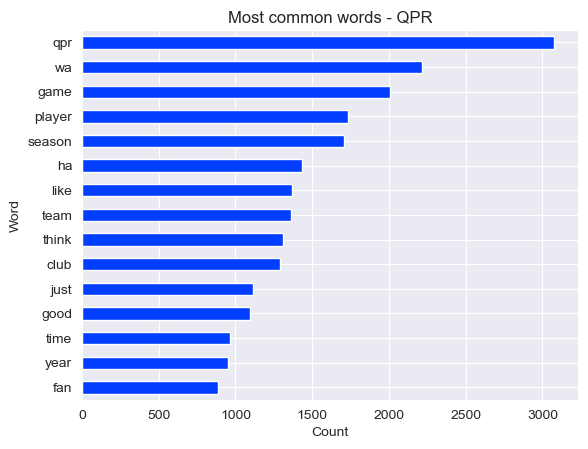

In [213]:
qpr_tk.sum().nlargest(15)[-1::-1].plot(kind = 'barh')
plt.title('Most common words - QPR')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

- QPR as predicted is the most common word used, other expected words include game, player, season and team.
- 'Good' appears 1094 times, and no negative words appear in the top 15 words

In [16]:
# Regex patterns used to replace digits, 
# words shorter than 3 characters and punctuation with empty string

liv['body'] = liv['body'].str.replace('\d+', '') # for digits
liv['body'] = liv['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
liv['body'] = liv['body'].str.replace('[^\w\s]', '') # for punctuation 
liv.body.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)


liv.body = liv.body.str.replace('_', '')

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5214/2879387946.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  liv['body'] = liv['body'].str.replace('\d+', '') # for digits
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5214/2879387946.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  liv['body'] = liv['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5214/2879387946.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  liv['body'] = liv['body'].str.replace('[^\w\s]', '') # for punctuation


In [17]:
liv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143966 entries, 0 to 143965
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   subreddit         143966 non-null  object 
 1   body              139676 non-null  object 
 2   score             143966 non-null  float64
 3   length            143966 non-null  int64  
 4   num_comments      143966 non-null  int64  
 5   utc_datetime_str  143966 non-null  object 
 6   id                143966 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.7+ MB


In [18]:
liv.dropna(inplace = True)

In [19]:
liv.shape

(139676, 7)

In [20]:
# Count Vectorizer used with LemmaTokenizer as the tokenizer method
# Default english stop words removed, only words appearing 
# over 10 times and in less than 50% of the rows are tokenized

liv_tk = cvx.fit_transform(liv['body'])
liv_tk = pd.DataFrame(liv_tk.todense(), columns=cvx.get_feature_names_out())

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
liv_tk.shape

(139676, 13627)

In [23]:
liv_tk.head()

,aage,aanholt,aarhus,aaron,aaronson,abandon,abandoned,abbas,abbreviationfull,abdi,...,zonal,zone,zonzi,zoom,zorc,zouma,zrich,zurich,zvezda,zwolle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Liverpool Most Common words

In [24]:
liv_tk.sum().nlargest(15)

liverpool    70569
wa           33850
game         33181
player       28339
goal         27699
league       26808
ha           25902
season       25228
team         22038
just         20290
time         19601
klopp        17873
like         17555
match        17475
think        16701
dtype: int64

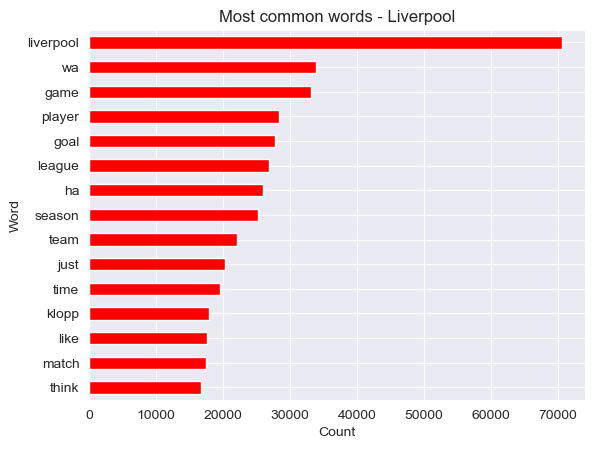

In [214]:
# Bar plot showing most common liverpool subreddit words
# autumn cmap used to produce a red colour (only need hue #1)

liv_tk.sum().nlargest(15)[-1::-1].plot(kind = 'barh', colormap='autumn')
plt.title('Most common words - Liverpool')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

- Lots of similar words appearing in both subreddits such as: game, player, league, season etc.
- klopp appears on the most common words, suggesting a stronger manager to community connection when compared to qpr.
- Interestingly, goal appears in the top words in the Liverpool subreddit, but does not in QPRs. This may be because of a lack of comment data from liverpools subreddit. Goal would likely appear in main posts more frequently than comments.

In [141]:
qpr_tk.shape, qpr.shape

((8476, 2336), (8476, 4))

In [142]:
liv_tk.shape, liv.shape

((139676, 13627), (139676, 7))

In [147]:
liv.head(1)

,subreddit,body,score,length,num_comments,date_posted,id
0,LiverpoolFC,Conor Bradley won the EFL Trophy with Bolton W...,1.0,25,0,2023-04-02,129r8dh


In [145]:
qpr_p.head(0)

,subreddit,body,score,length,num_comments,date_posted,id


In [32]:
qpr_p.rename(columns = {
    'selftext' : 'body',
    'utc_datetime_str' : 'date_posted'
}, inplace = True)

In [34]:
liv.rename(columns = {
    'utc_datetime_str' : 'date_posted'
}, inplace = True)

In [146]:
qpr_p.head()

,subreddit,body,score,length,num_comments,date_posted,id
0,superhoops,Hey guys. I’m making a Queens Park Rangers Car...,1,35,0,2023-03-25,121vebo
1,superhoops,Gareth Ainsworth: EFL financial woes not helpe...,1,12,0,2023-03-22,11yaovc
2,superhoops,Watford lose Wilder's first game as Rangers en...,1,11,0,2023-03-12,11p6t24
3,superhoops,Wesley Hoedt refuses to shake hands with Garet...,1,12,0,2023-03-11,11opn12
4,superhoops,Tyler Roberts returning to Leeds to review inj...,1,17,0,2023-03-10,11nchpj


In [35]:
liv.date_posted = liv.date_posted.str[:10]

In [37]:
liv_p = liv

### Strength of Language Analysis

In [72]:
team_swears['QPR'] = {}
team_swears['LIV'] = {}

In [174]:
# Dictionary of common arbitrary swear words
# Posts not containing the target word are filtered out, the remaining df length is divided by the
# starting df length and * 100 to calculate the percentage of posts containing it

swears = {}

swears['Swears'] = ['F*CK', 'SH*T', 'C*NT', 'TW*T', 'CR*P'] * 2
swears['Values'] = [
    len(qpr_p[qpr_p['body'].str.lower().str.contains('fuck')])*100/len(qpr_p),
    len(qpr_p[qpr_p['body'].str.lower().str.contains('shit')])*100/len(qpr_p),
    len(qpr_p[qpr_p['body'].str.lower().str.contains('cunt')])*100/len(qpr_p),
    len(qpr_p[qpr_p['body'].str.lower().str.contains('twat')])*100/len(qpr_p),
    len(qpr_p[qpr_p['body'].str.lower().str.contains('crap')])*100/len(qpr_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('fuck')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('shit')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('cunt')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('twat')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('crap')])*100/len(liv_p)
]
swears['Team'] = ['QPR','QPR','QPR','QPR','QPR','LIV','LIV','LIV','LIV','LIV']

In [175]:
swears

{'Swears': ['F*CK',
  'SH*T',
  'C*NT',
  'TW*T',
  'CR*P',
  'F*CK',
  'SH*T',
  'C*NT',
  'TW*T',
  'CR*P'],
 'Values': [0.4137492043284532,
  0.732017823042648,
  0.06365372374283895,
  0.031826861871419476,
  0.3819223424570337,
  1.688192674475214,
  1.5593230046679458,
  0.2197943812823964,
  0.07302614622411867,
  0.23268134826312323],
 'Team': ['QPR',
  'QPR',
  'QPR',
  'QPR',
  'QPR',
  'LIV',
  'LIV',
  'LIV',
  'LIV',
  'LIV']}

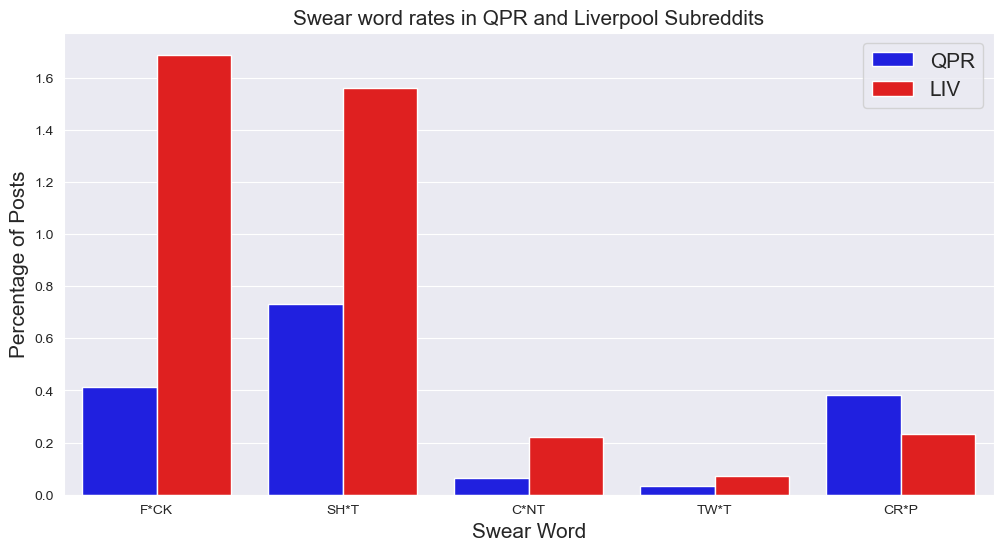

In [176]:
sns.set_style('darkgrid')
sns.set_palette('bright')

# this isnt needed on retrospective viewing, 
# but a line would need to written to set the figsize anyway
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='Swears', 
            y='Values', 
            hue='Team', 
            data=swears, 
            palette = ['blue', 'red']
           )
plt.xlabel('Swear Word', fontsize = 15)     
plt.ylabel('Percentage of Posts', fontsize = 15)
plt.title('Swear word rates in QPR and Liverpool Subreddits', fontsize= 15)
plt.legend(fontsize = 15);

Liverpool subreddit has a much higher percentage of posts with 4 of the 5 swear words. 'Crap' is however more commonly used in the qpr subreddit. This may be a result of dialect differences between northern and southern fanbases. These results are taken from purely post data, excluding comments.

In [172]:
swears_coms = {}

swears_coms['Swears'] = ['F*CK', 'SH*T', 'C*NT', 'TW*T', 'CR*P'] * 2
swears_coms['Values'] = [
    len(qpr[qpr['body'].str.lower().str.contains('fuck')])*100/len(qpr),
    len(qpr[qpr['body'].str.lower().str.contains('shit')])*100/len(qpr),
    len(qpr[qpr['body'].str.lower().str.contains('cunt')])*100/len(qpr),
    len(qpr[qpr['body'].str.lower().str.contains('twat')])*100/len(qpr),
    len(qpr[qpr['body'].str.lower().str.contains('crap')])*100/len(qpr),
    len(liv_p[liv_p['body'].str.lower().str.contains('fuck')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('shit')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('cunt')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('twat')])*100/len(liv_p),
    len(liv_p[liv_p['body'].str.lower().str.contains('crap')])*100/len(liv_p)
]
swears_coms['Team'] = ['QPR','QPR','QPR','QPR', 'QPR', 'LIV','LIV','LIV','LIV', 'LIV']

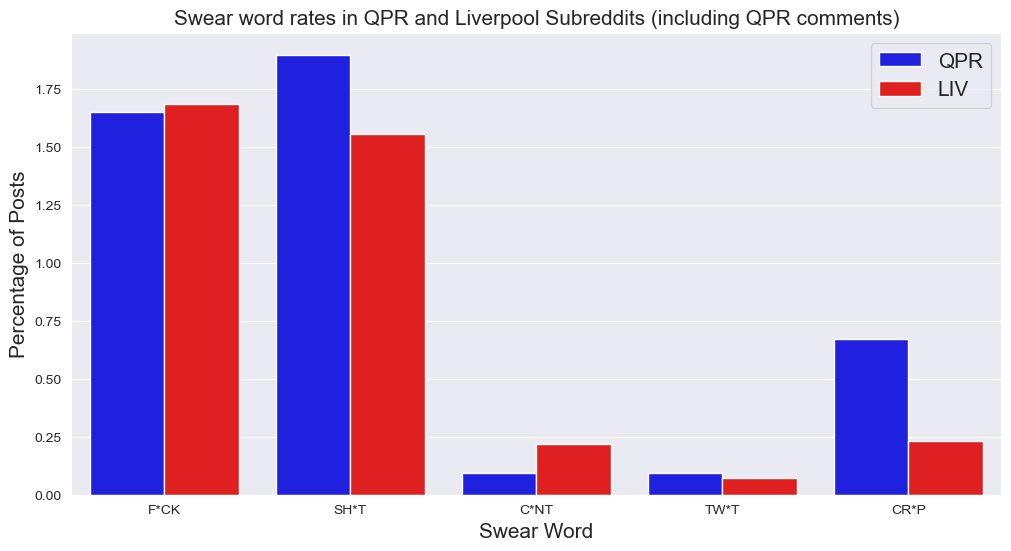

In [177]:
sns.set_style('darkgrid')
sns.set_palette('bright')

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='Swears', 
            y='Values', 
            hue='Team', 
            data=swears_coms, 
            palette = ['blue', 'red']
           )
plt.xlabel('Swear Word', fontsize = 15)     
plt.ylabel('Percentage of Posts', fontsize = 15)
plt.title('Swear word rates in QPR and Liverpool Subreddits (including QPR comments)', fontsize= 15)
plt.legend(fontsize = 15);

The expectation of including comments in the data was that the occurence of swearing would increase. When compared to the data from only main posts, we can see that the level of swearing is much more comparable between the two subreddits. Decreased exposure to readers when commenting may remove some of the filter for inappropriate language, increasing the occurence. Pulling extra data from liverpool comments would be interesting to investigate this trend. 

In [ ]:
#combining dataframes
qpr_liv_posts = pd.concat((liv_p, qpr_p), axis = 0)

In [ ]:
qpr_liv_posts.shape

In [178]:
qpr_p.num_comments.mean()

3.0642902609802674

In [179]:
liv_p.num_comments.mean()

40.831323921074485

- Liverpool subreddit has a much larger average number of comments than QPRs, as expected.

In [180]:
qpr_p_tot = len(qpr_p)
liv_p_tot = len(liv_p)

In [181]:
# This function takes a date column in the format YYYY:MM:DD,
# takes the first 4 characters of the string and creates a mask for the original df using these
# The length of the masked df is then added to a dictionary for each unique year in the df

def posts_per_year(date_col):
    team_dict = {}
    for year in date_col.str[:4].sort_values(ascending = True).unique():
        team_dict[year] = len(date_col[date_col.str[:4] == year])
    return team_dict

In [182]:
liv_dict = posts_per_year(liv_p.date_posted)

In [183]:
liv_dict

{'2010': 82,
 '2011': 1134,
 '2012': 3873,
 '2013': 6758,
 '2014': 12244,
 '2015': 11939,
 '2016': 11819,
 '2017': 15467,
 '2018': 21314,
 '2019': 19566,
 '2020': 13934,
 '2021': 10585,
 '2022': 8749,
 '2023': 2212}

In [184]:
qpr_dict = posts_per_year(qpr_p.date_posted)

In [185]:
qpr_dict

{'2011': 49,
 '2012': 341,
 '2013': 421,
 '2014': 667,
 '2015': 554,
 '2016': 331,
 '2017': 191,
 '2018': 129,
 '2019': 141,
 '2020': 145,
 '2021': 109,
 '2022': 17,
 '2023': 47}

In [186]:
sns.set_style(None)

In [187]:
# Dictionary manually created using information found on google
# values correspond to the cumulative league finish
# ie. 1-20 are positions in the top division, 21-44 are positions in the second division

liv_positions = {
    '2010' : 7,
    '2011' : 6,
    '2012' : 8,
    '2013' : 7,
    '2014' : 2,
    '2015' : 6,
    '2016' : 8,
    '2017' : 4,
    '2018' : 4,
    '2019' : 2,
    '2020' : 1,
    '2021' : 3,
    '2022' : 2,
    '2023' : 6
}
qpr_positions = {
    '2011' : 21,
    '2012' : 17,
    '2013' : 20,
    '2014' : 24,
    '2015' : 20,
    '2016' : 32,
    '2017' : 38,
    '2018' : 36,
    '2019' : 39,
    '2020' : 33,
    '2021' : 29,
    '2022' : 31,
    '2023' : 39
}

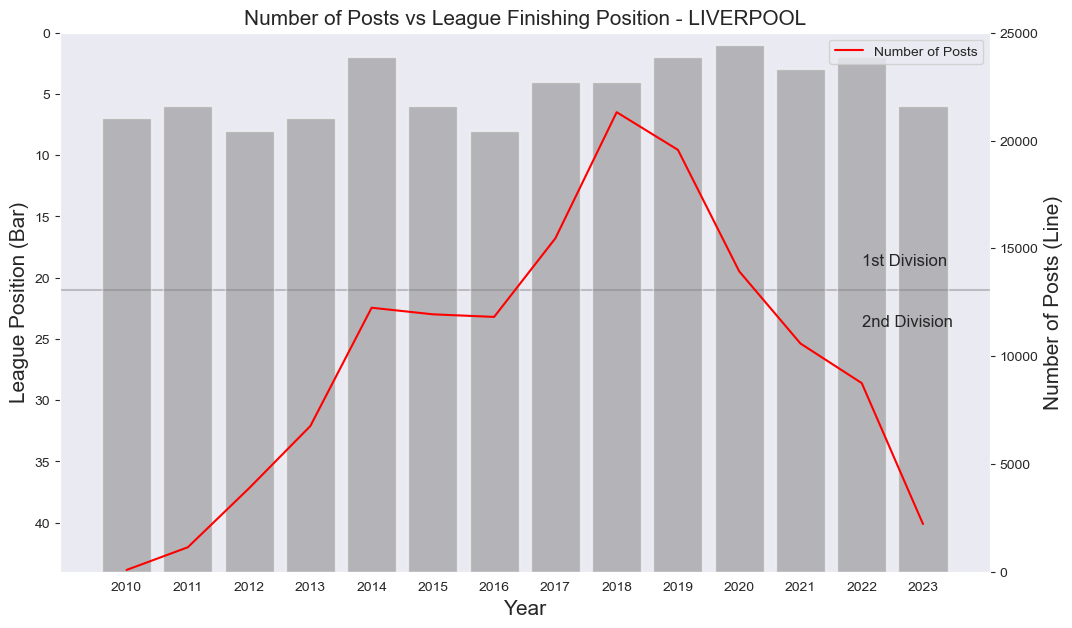

In [216]:
sns.set_style('dark')
fig, axs = plt.subplots(1,figsize = (12, 7))

axs.bar(x = list(liv_positions.keys()),
        height = 44*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 10)
axs.set_ylim(44,0)
ax2 = axs.twinx()
ax2.grid(False)

sns.lineplot(x = liv_dict.keys(),
            y = liv_dict.values(),
            ax = ax2,
            color = 'red',
            label = 'Number of Posts'

            )
axs.set_xlabel('Year', fontsize=15)
axs.set_ylabel('League Position (Bar)', fontsize = 15)
ax2.set_ylabel('Number of Posts (Line)', fontsize=15)
ax2.set_title('Number of Posts vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 25000)
axs.axhline(21, alpha = 0.2, color = 'black')
axs.text('2022', 19, '1st Division', fontsize=12, zorder = 11)
axs.text('2022', 24, '2nd Division', fontsize=12, zorder = 11);

Justification for Adjusting the scale of the left y-axis - using identical scales for both teams would be useless to uncover any trends, since Liverpools variation in league position is much lower than QPRs

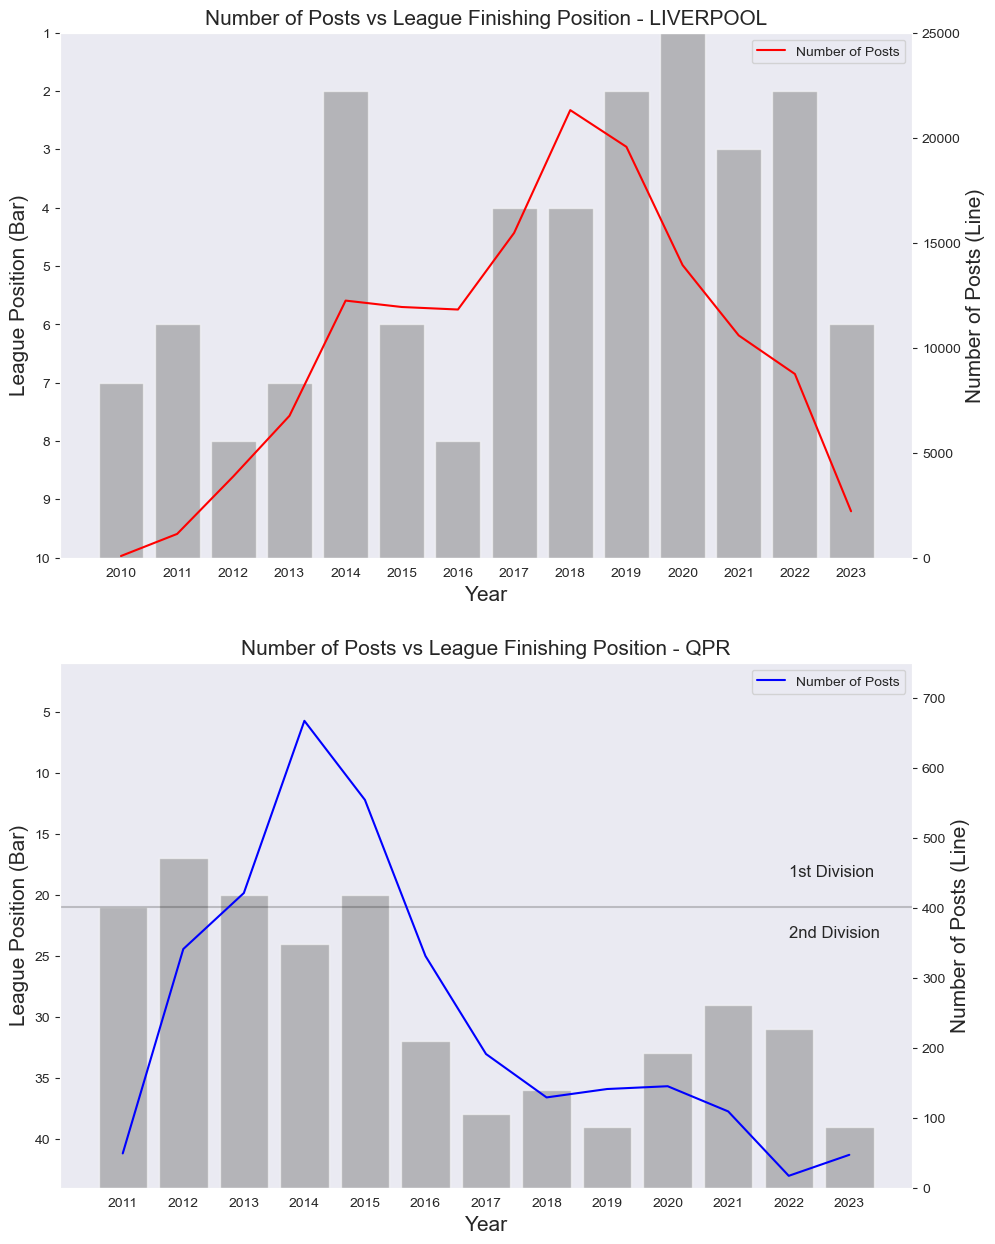

In [189]:
fig, axs = plt.subplots(2,figsize = (11, 15))

axs[0].bar(x = list(liv_positions.keys()),
        height = 10*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1
          )

axs[0].set_ylim(10,1)
ax2 = axs[0].twinx()
ax2.grid(False)

sns.lineplot(x = liv_dict.keys(),
            y = liv_dict.values(),
            ax = ax2,
            color = 'red',
            label = 'Number of Posts'
            )
axs[0].set_xlabel('Year', fontsize=15)
axs[0].set_ylabel('League Position (Bar)', fontsize = 15)
ax2.set_ylabel('Number of Posts (Line)', fontsize=15)
ax2.set_title('Number of Posts vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 25000)


axs[1].bar(x = list(qpr_positions.keys()),
        height = 44*np.ones(len(list(qpr_positions.values())))-list(qpr_positions.values()), 
        bottom= list(qpr_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1)
axs[1].set_ylim(44,1)
ax4 = axs[1].twinx()
ax4.grid(False)

sns.lineplot(x = qpr_dict.keys(),
            y = qpr_dict.values(),
            ax = ax4,
            color = 'blue',
            label = 'Number of Posts'

            )
axs[1].set_xlabel('Year', fontsize=15)
axs[1].set_ylabel('League Position (Bar)', fontsize = 15)
axs[1].axhline(21, alpha = 0.2, color = 'black')
ax4.set_ylabel('Number of Posts (Line)', fontsize=15)
ax4.set_title('Number of Posts vs League Finishing Position - QPR', fontsize=15)
ax4.set_ylim(0, 750)
axs[1].text('2022', 18.5, '1st Division', fontsize=12)
axs[1].text('2022', 23.5, '2nd Division', fontsize=12);


- Liverpool Average number of posts per year increases until 2018, and steadily decreases afterwards, data from 2023 is not reliable since only a few months have passed.
- Improved team performances generally correlate with an increase in total yearly posts in the liverpool instance. Perhaps prolonged success could be causing a drop in community activity however there may be many factors causing this decline.

- Relative success for QPR between 2011 and 2015 also is shown to be the most active years for this subreddit. 2011 is low because not only was the subreddit new, but reddit in general was not a popular resource.
- Relegation in 2015 clearly reduced community activity and post quantities have never fully recovered since QPRs time in the Premier League (1st division). The most active year was a year in the championship (2nd Division) in 2014, however this season was a year of high win percentage when compared to low finishes in the top division, so increased activity is likely.

In [190]:
qpr_p.length.mean()

46.229471674092935

In [191]:
liv_p.length.mean()

53.20276210658954

In [192]:
qpr_p.score.mean()

6.4901336728198595

In [193]:
liv_p.score.mean()

115.28410750594233

- QPR posts are slightly shorter on average than liverpool posts. 
- As expected, the average upvote rate in QPRs subreddit is significantly lower than liverpools.

In [195]:
# Function above adapted to accomodate for multiple columns required for masking
# similarly, a dictionary of the average post score 
# is recorded for each year mask in the date_posted column

qpr_post_scores = {}
for year in qpr_p.date_posted.str[:4].sort_values(ascending = True).unique():
    qpr_post_scores[year] = qpr_p[qpr_p.date_posted.str[:4] == year].score.mean()
    

liv_post_scores = {}
for year in liv_p.date_posted.str[:4].sort_values(ascending = True).unique():
    liv_post_scores[year] = liv_p[liv_p.date_posted.str[:4] == year].score.mean()
    

In [197]:
qpr_post_scores

{'2011': 2.326530612244898,
 '2012': 3.067448680351906,
 '2013': 4.330166270783848,
 '2014': 6.275862068965517,
 '2015': 6.98014440433213,
 '2016': 6.495468277945619,
 '2017': 6.481675392670157,
 '2018': 7.48062015503876,
 '2019': 9.652482269503546,
 '2020': 12.441379310344828,
 '2021': 16.24770642201835,
 '2022': 1.0,
 '2023': 1.0638297872340425}

In [198]:
liv_post_scores

{'2010': 5.378048780487805,
 '2011': 9.889770723104057,
 '2012': 15.087787245029693,
 '2013': 22.2787807043504,
 '2014': 25.16440705651748,
 '2015': 31.649886925203116,
 '2016': 55.86877062357222,
 '2017': 78.99631473459624,
 '2018': 134.28131744393357,
 '2019': 164.60262700603087,
 '2020': 201.45091143964405,
 '2021': 233.9818611242324,
 '2022': 222.11681335009715,
 '2023': 1.7811934900542497}

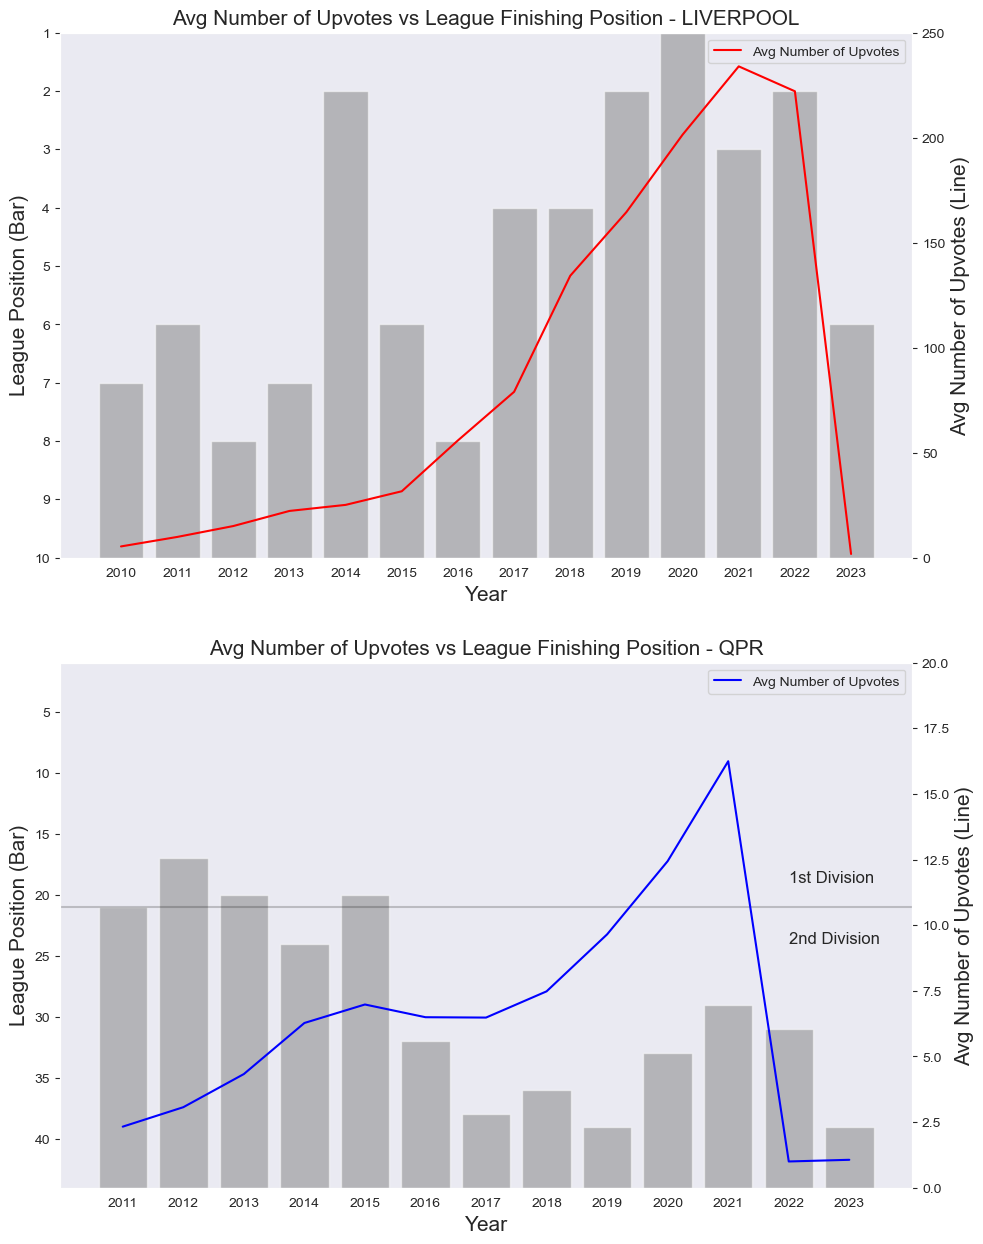

In [217]:
sns.set_style('dark')
fig, axs = plt.subplots(2,figsize = (11, 15))


axs[0].bar(x = list(liv_positions.keys()),
        height = 10*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1
          )

axs[0].set_ylim(10,1)
ax2 = axs[0].twinx()
ax2.grid(False)

sns.lineplot(x = liv_post_scores.keys(),
            y = liv_post_scores.values(),
            ax = ax2,
            color = 'red',
            label = 'Avg Number of Upvotes'
            )
axs[0].set_xlabel('Year', fontsize=15)
axs[0].set_ylabel('League Position (Bar)', fontsize = 15)
ax2.set_ylabel('Avg Number of Upvotes (Line)', fontsize=15)
ax2.set_title('Avg Number of Upvotes vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 250)


axs[1].bar(x = list(qpr_positions.keys()),
        height = 44*np.ones(len(list(qpr_positions.values())))-list(qpr_positions.values()), 
        bottom= list(qpr_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1)
axs[1].set_ylim(44,1)
ax4 = axs[1].twinx()
ax4.grid(False)

sns.lineplot(x = qpr_post_scores.keys(),
            y = qpr_post_scores.values(),
            ax = ax4,
            color = 'blue',
            label = 'Avg Number of Upvotes'

            )
axs[1].set_xlabel('Year', fontsize=15)
axs[1].set_ylabel('League Position (Bar)', fontsize = 15)
axs[1].axhline(21, alpha = 0.2, color = 'black')
ax4.set_ylabel('Avg Number of Upvotes (Line)', fontsize=15)
ax4.set_title('Avg Number of Upvotes vs League Finishing Position - QPR', fontsize=15)
ax4.set_ylim(0, 20)
axs[1].text('2022', 19, '1st Division', fontsize=12)
axs[1].text('2022', 24, '2nd Division', fontsize=12);


- Unlike the overall activity, there does not seem to be a trend in the post approval with team performance in the QPR subreddit. 
- There is a strong match in the trend for the liverpool subreddit, however the upvote trend is very similar to the qpr subreddit trend, so it cannot be confirmed that the improved team performance is causing this.
- Strangely, the qpr subreddit drops in average upvote score in 2022, perhaps due to a subduing in community activity for this subreddit. Years spanning the SARS-CoV-2 pandemic coincide with the highest average post score, perhaps caused by an increase in online viewing of sport during this period.

In [200]:
# Same loop but for average post length

liv_post_lengths = {}
for year in liv_p.date_posted.str[:4].sort_values(ascending = True).unique():
    liv_post_lengths[year] = liv_p[liv_p.date_posted.str[:4] == year].length.mean()

In [201]:
# 2010 deleted so make line plots match in the next figure

del liv_post_lengths['2010']

In [202]:
liv_post_lengths

{'2011': 57.425925925925924,
 '2012': 63.05138135812032,
 '2013': 57.99955608168097,
 '2014': 65.91938908853317,
 '2015': 70.03459251193567,
 '2016': 77.2473136475167,
 '2017': 61.65054632443266,
 '2018': 46.0441493853805,
 '2019': 42.14658080343453,
 '2020': 39.53710348787139,
 '2021': 41.235710911667454,
 '2022': 38.288032918047776,
 '2023': 38.95117540687161}

In [203]:
qpr_post_lengths = {}
for year in qpr_p.date_posted.str[:4].sort_values(ascending = True).unique():
    qpr_post_lengths[year] = qpr_p[qpr_p.date_posted.str[:4] == year].length.mean()

In [204]:
qpr_post_scores

{'2011': 2.326530612244898,
 '2012': 3.067448680351906,
 '2013': 4.330166270783848,
 '2014': 6.275862068965517,
 '2015': 6.98014440433213,
 '2016': 6.495468277945619,
 '2017': 6.481675392670157,
 '2018': 7.48062015503876,
 '2019': 9.652482269503546,
 '2020': 12.441379310344828,
 '2021': 16.24770642201835,
 '2022': 1.0,
 '2023': 1.0638297872340425}

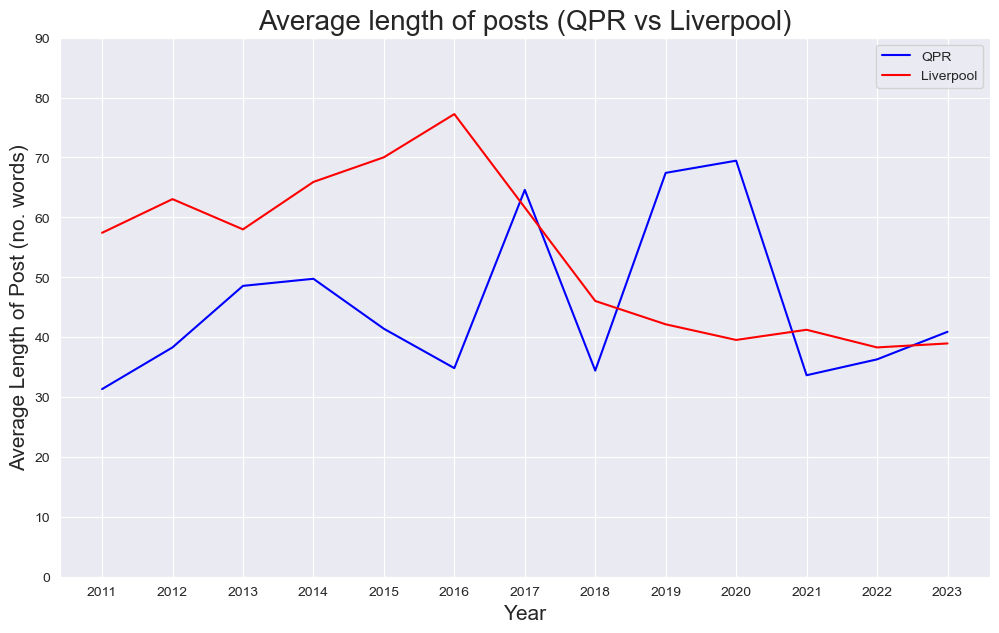

In [206]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(figsize = (12, 7))

sns.lineplot(x = qpr_post_lengths.keys(),
            y = qpr_post_lengths.values(),
            ax = axs,
            color = 'blue',
            label = 'QPR')
sns.lineplot(x = liv_post_lengths.keys(),
            y = liv_post_lengths.values(),
            ax = axs,
            color = 'red',
            label = 'Liverpool')
axs.set_ylim(0,90)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylabel('Average Length of Post (no. words)', fontsize=15)
axs.set_title('Average length of posts (QPR vs Liverpool)', fontsize=20);


- The liverpool average word count has decreased over the last decade, particularly dropping during the years of success in 2018 - 2022. Perhaps increased influx of new fans in this time wanting to post simpler picture posts of iconic goals or moments in this period is causing this.
- Otherwise, years of struggle for liverpool (pre 2017) would be a time of increased anguish in the community, leading to longer and more opinionated posts. 
- This data is not reliable, since all posts below 10 words in length have been filtered out. One of these subreddits may have a huge number of these posts, which would massively reduce the average word count.

In [207]:
qpr.head()

,subreddit,body,length,post_date
0,superhoops,Calls him disgrace but still says good play...,24,2011-09-26
1,superhoops,BBC Football Tactics Goalshy QPR need forma...,11,2011-09-26
2,superhoops,Sept you are hurting inside you can really ...,37,2011-09-26
3,superhoops,This great resource which been using since ...,34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions gam...,12,2011-09-26


In [208]:
liv = liv_p[['subreddit', 'body', 'length', 'date_posted']]

In [209]:
qpr.rename(columns = {
    'post_date' : 'date_posted'
}, inplace = True)

In [210]:
liv.subreddit.value_counts()

LiverpoolFC    139676
Name: subreddit, dtype: int64

In [211]:
qpr.head()

,subreddit,body,length,date_posted
0,superhoops,Calls him disgrace but still says good play...,24,2011-09-26
1,superhoops,BBC Football Tactics Goalshy QPR need forma...,11,2011-09-26
2,superhoops,Sept you are hurting inside you can really ...,37,2011-09-26
3,superhoops,This great resource which been using since ...,34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions gam...,12,2011-09-26


In [212]:
# dataframes saved in datasets folder for preprocessing and modeling

liv.to_csv('../../4-preprocessing-modelling/datasets/liv-2.csv', index = False)
qpr.to_csv('../../4-preprocessing-modelling/datasets/qpr.csv', index = False)